## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [11]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [12]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [13]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)
data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22,"Montevideo, Uruguay"


In [14]:
cabin_test = data.iloc[2,9]

In [15]:
cabin_test.split()[0]

'C22'

In [41]:
cabin_test.astype(str).str[0]

AttributeError: 'str' object has no attribute 'astype'

In [16]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22,"Montevideo, Uruguay"


In [17]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,NaN,"New York, NY",Mr
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Miss
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,NaN,NaN,"Belfast, NI",Mr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Mrs
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22,"Montevideo, Uruguay",Mr


In [18]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [19]:
# check if type conversion worked
type(data['fare'][0])

numpy.float64

In [20]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [46]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [21]:
target = 'survived'
data.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
cabin        object
embarked     object
title        object
dtype: object

In [22]:
vars_num = [i for i in data.columns if  i != target and data[i].dtype == 'int' or data[i].dtype == 'float']
vars_cat = [i for i in data.columns if data[i].dtype == 'object']
print(f"Amount of numerical var's is: {len(vars_num)}. I.e. the following:")
print(vars_num)
print(f"Amount of categorical var's is: {len(vars_cat)}. I.e. the following:")
print(vars_cat)


Amount of numerical var's is: 5. I.e. the following:
['pclass', 'age', 'sibsp', 'parch', 'fare']
Amount of categorical var's is: 4. I.e. the following:
['sex', 'cabin', 'embarked', 'title']


### Find missing values in variables

In [23]:
new_line = '\n'

In [24]:
# first in numerical variables
print(f"amount of missing values per numvariable: {new_line}{data[vars_num].isnull().sum()}")
vars_num_na = [i for i in data[vars_num] if data[i].isnull().sum()>0]
print(new_line)
print(f"percentage of missing values per numvariable: {new_line}{data[vars_num].isnull().mean()}")
print(new_line)
print (f"numvars with missing values are: {vars_num_na}")

amount of missing values per numvariable: 
pclass      0
age       263
sibsp       0
parch       0
fare        1
dtype: int64


percentage of missing values per numvariable: 
pclass    0.000000
age       0.200917
sibsp     0.000000
parch     0.000000
fare      0.000764
dtype: float64


numvars with missing values are: ['age', 'fare']


In [25]:
# now in categorical variables
print(f"amount of missing values per catvariable: {new_line}{data[vars_cat].isnull().sum()}")
vars_cat_na = [i for i in data[vars_cat] if data[i].isnull().sum()>0]
print(new_line)
print(f"percentage of missing values per catvariable: {new_line}{data[vars_cat].isnull().mean()}")
print(new_line)
print (f"numvars with missing values are: {vars_cat_na}")


amount of missing values per catvariable: 
sex            0
cabin       1014
embarked       2
title          0
dtype: int64


percentage of missing values per catvariable: 
sex         0.000000
cabin       0.774637
embarked    0.001528
title       0.000000
dtype: float64


numvars with missing values are: ['cabin', 'embarked']


### Determine cardinality of categorical variables

In [29]:
data[vars_cat].nunique().sort_values(ascending=False)

cabin       181
title         5
embarked      3
sex           2
dtype: int64

### Determine the distribution of numerical variables

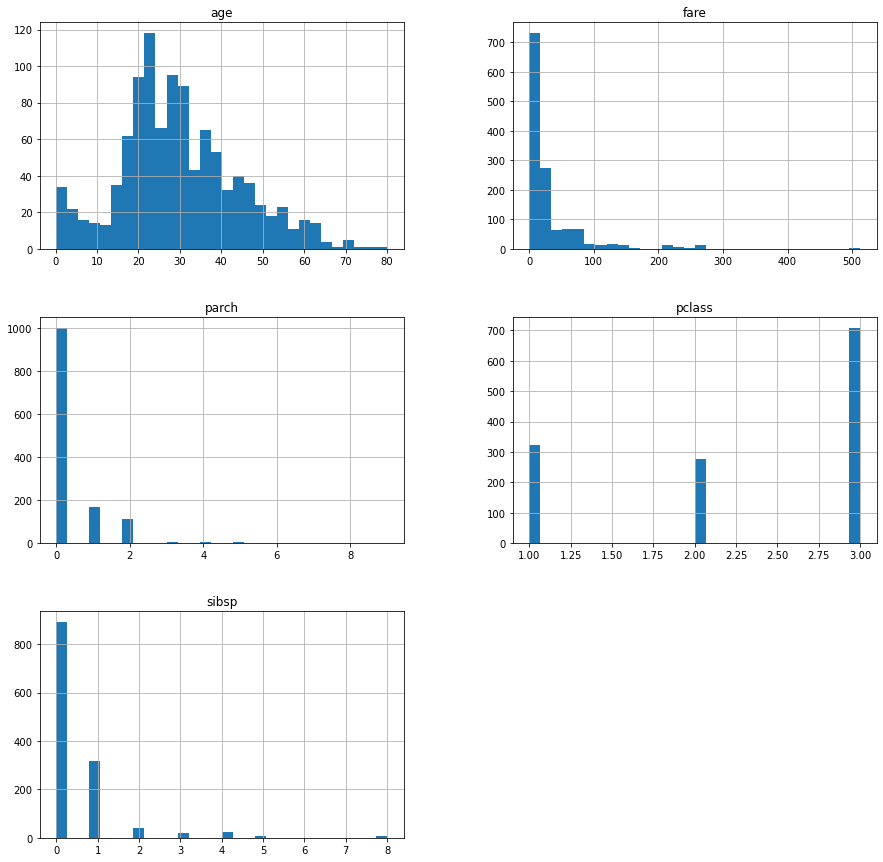

In [31]:
data[vars_num].hist(bins=30, figsize=(15,15))
plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [50]:
X_train['cabin'] = [x[0] if isinstance(x, str) else np.nan for x in X_train['cabin']]
X_test['cabin'] = [x[0] if isinstance(x, str) else np.nan for x in X_test['cabin']]
X_train['cabin'].unique()



array([nan, 'E', 'F', 'A', 'C', 'D', 'B', 'T', 'G'], dtype=object)

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [51]:
vars_num_na

['age', 'fare']

In [53]:
for i in vars_num_na:
    # median of those vars in the dataset the algo will be trained on
    median_val = X_train[i].median()
    print(i,median_val)
    
    # adding a column for every feature in vars_num_na that indicates the row has a missing val
    X_train[i + '_missingval'] = np.where(X_train[i].isnull(), 1, 0)
    X_test[i + '_missingval'] = np.where(X_test[i].isnull(), 1, 0)
    
    # replace missing vals with median
    X_train[i].fillna(median_val, inplace=True)
    X_test[i].fillna(median_val, inplace=True)

# at the end of the for loop check if everything is indeed filled
X_train[vars_num_na].isnull().sum()
X_test[vars_num_na].isnull().sum()

age 28.0
fare 14.4542


age     0
fare    0
dtype: int64

In [55]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_missingval,fare_missingval
1118,3,male,25.0,0,0,7.9250,NaN,S,Mr,0,0
44,1,female,41.0,0,0,134.5000,E,C,Miss,0,0
1072,3,male,28.0,0,0,7.7333,NaN,Q,Mr,1,0
1130,3,female,18.0,0,0,7.7750,NaN,S,Miss,0,0
574,2,male,29.0,1,0,21.0000,NaN,S,Mr,0,0


### Replace Missing data in categorical variables with the string **Missing**

In [56]:
X_train[vars_cat_na] = X_train[vars_cat_na].fillna('Missing')
X_test[vars_cat_na] = X_test[vars_cat_na].fillna('Missing')

In [58]:
X_train[vars_cat_na].isnull().sum()

cabin       0
embarked    0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [65]:
def find_frequent_labels(df, feature, percentage_treshold):
    df = df.copy()
    freq_label = df.groupby(feature)[feature].count() / len(df)
    return freq_label[freq_label > percentage_treshold].index

In [78]:
for i in vars_cat:
    print(find_frequent_labels(X_train, i, 0.05))
    print(X_train[i].nunique())
print(new_line)
print(vars_cat)
print(new_line)

Index(['female', 'male'], dtype='object', name='sex')
2
Index(['C', 'Missing'], dtype='object', name='cabin')
9
Index(['C', 'Q', 'S'], dtype='object', name='embarked')
4
Index(['Miss', 'Mr', 'Mrs'], dtype='object', name='title')
5


['sex', 'cabin', 'embarked', 'title']




In [76]:
freq_label2 = X_train.groupby('cabin')['cabin'].count() / len(X_train)

In [77]:
freq_label2

cabin
A          0.018147
B          0.049666
C          0.074499
D          0.034384
E          0.034384
F          0.017192
G          0.003820
Missing    0.766953
T          0.000955
Name: cabin, dtype: float64

In [83]:
#now for the real transformation deal
for i in vars_cat:
    freq_labels = find_frequent_labels(X_train, i, 0.05)
    X_train[i] = np.where(X_train[i].isin(freq_labels), X_train[i], 'Rare')
    X_test[i] = np.where(X_test[i].isin(freq_labels), X_test[i], 'Rare')

In [84]:
X_train[vars_cat].nunique()

sex         2
cabin       3
embarked    4
title       4
dtype: int64

In [86]:
X_test[vars_cat].nunique()

sex         2
cabin       3
embarked    3
title       4
dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [87]:
for i in vars_cat:
    
    # to create the binary variables, we use get_dummies from pandas
    
    X_train = pd.concat([X_train,
                         pd.get_dummies(X_train[i], prefix=i, drop_first=True)
                         ], axis=1)
    
    X_test = pd.concat([X_test,
                        pd.get_dummies(X_test[i], prefix=i, drop_first=True)
                        ], axis=1)
    

X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)

X_train.shape, X_test.shape

((1047, 16), (262, 15))

In [88]:
X_test['embarked_Rare'] = 0
X_test.shape

(262, 16)

In [89]:
features = [i for i in X_train.columns]
features

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'age_missingval',
 'fare_missingval',
 'sex_male',
 'cabin_Missing',
 'cabin_Rare',
 'embarked_Q',
 'embarked_Rare',
 'embarked_S',
 'title_Mr',
 'title_Mrs',
 'title_Rare']

### Scale the variables

- Use the standard scaler from Scikit-learn

In [90]:
# create instance from the method
scaler = StandardScaler()
# train it
scaler.fit(X_train[features])
# apply scaler to the train and test set
X_train = scaler.transform(X_train[features])
X_test = scaler.transform(X_test[features])

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [92]:
# create instance of the model
model = LogisticRegression(C=0.0005, random_state=0)
# train it
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [94]:
#training dataset
predictions = model.predict(X_train)
prop_survive = model.predict_proba(X_train)[:,1]

#mse and rmse for training
print(f"train roc-auc: {roc_auc_score(y_train, prop_survive)}")
print(f"train accuracy: {accuracy_score(y_train, predictions)}")

print(new_line)

#test dataset
predictions = model.predict(X_test)
prop_survive = model.predict_proba(X_test)[:,1]

#mse and rmse for training
print(f"train roc-auc: {roc_auc_score(y_test, prop_survive)}")
print(f"train accuracy: {accuracy_score(y_test, predictions)}")



train roc-auc: 0.8431723338485316
train accuracy: 0.7125119388729704


train roc-auc: 0.8354012345679012
train accuracy: 0.7022900763358778


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**